In [1]:
'''
Importing necessary packages
'''
import numpy as np
import pandas as pd
import sklearn

In [2]:
'''
Reading the dataset 
'''
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5472,ham,Well obviously not because all the people in m...,NaN,NaN,NaN
5175,ham,Raji..pls do me a favour. Pls convey my Birthd...,NaN,NaN,NaN
831,ham,Hi mate its RV did u hav a nice hol just a mes...,NaN,NaN,NaN
5051,ham,"Tick, tick, tick .... Where are you ? I could ...",NaN,NaN,NaN
4284,ham,I pocked you up there before,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# stages of project

# 1. Data cleaning 
# 2. EDA - Exploratory Data Analysis 
# 3. Text Preprocessing 
# 4. Model Building 
# 5. Evaluation 
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data cleaning 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
'''
As you can see the unnamed column has 6-50 non-null values, so it would be beter to drop the last 3 columns 
'''
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [8]:
df.sample(5)

,v1,v2
4859,ham,"\Response\"" is one of d powerful weapon 2 occu..."
3396,ham,Heehee that was so funny tho
1945,ham,Can Ì_ call me at 10:10 to make sure dat i've ...
3521,ham,Im sorry bout last nite it wasnåÕt ur fault it...
3934,ham,You need to get up. Now.


In [9]:
# Lets rename the column names 

df.rename(columns={'v1':'target','v2':'text'}, inplace=True)
df.sample(5)

,target,text
2622,ham,Ok lor...
198,ham,Hi its Kate how is your evening? I hope i can ...
4532,spam,Gr8 new service - live sex video chat on your ...
3609,ham,"Call me. I m unable to cal. Lets meet bhaskar,..."
736,ham,Thanks for looking out for me. I really apprec...


In [10]:
'''
Now we would like to encode the 'target' column i a way we get, 1 for spam and 0 for ham
For this we must import the LabelEncoder module from sklearn.preprocessing
We must then fit_transform the encoder to the desired column, in this case 'target' column
'''
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# checking for missing values

df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for suplicate values 
df.duplicated().sum()

403

In [15]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# 2. EDA - Exploratory Data Analysis

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
'''
To view the distribution or percentage of 'ham' and 'spam' in the target column in the dataframe, we can use 
value_counts() 
'''
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

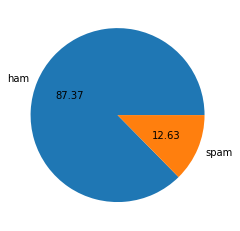

In [20]:
'''
To have a visual represenation of teh distribution, we can create a pie chart
'''
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
'''
Data is imbalaced as more than 80% of the values are not spam ('ham') and about 12% of the values are spam ('spam')
'''

"\nData is imbalaced as more than 80% of the values are not spam ('ham') and about 12% of the values are spam ('spam')\n"

In [22]:
'''
To see how many alphabets are being used, how many words are being used, what kind of senstences are being used in emails, 
we must perform further analysis on the data. 

For a deeper analysis we will be creating three more columns in the dataset ('no. of characters in the email',
'no. of words in the email','no. of sentences in the email', to do this we will need to use the nltk library )
'''

"\nTo see how many alphabets are being used, how many words are being used, what kind of senstences are being used in emails, \nwe must perform further analysis on the data. \n\nFor a deeper analysis we will be creating three more columns in the dataset ('no. of characters in the email',\n'no. of words in the email','no. of sentences in the email', to do this we will need to use the nltk library )\n"

In [23]:
import nltk

In [24]:
'''
Dwonloading dependencies for the nltk library to work with
'''
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vishnu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
'''
Lets create a new column called 'num_characters' that gives a total number of characters used in an email from the 
'text' column 
'''
df['num_characters'] = df['text'].apply(len)

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
'''
Now lets create a new column called 'num_words' which gives the total number of words in each email
For this we will need to used ntlk library 
'''

df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
'''
Now lets create a new column called 'num_sentences' which gives the total number of sentences in each email
For this we will need to used ntlk library for this as well  
'''

df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
'''
If we must analyze the columns 'num_characters', 'num_words' and 'num_sentences' we can use .describe() function on the 
specific columns  
'''

df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
# For ham emails
'''
If we must analyze the columns 'num_characters', 'num_words' and 'num_sentences' where 'target' is ham we can use .describe() function on the 
specific columns as well as specifying the 'target'==0  
'''
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [33]:
# For spam emails

df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [34]:
'''
We can view these distributions using plots 
'''
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

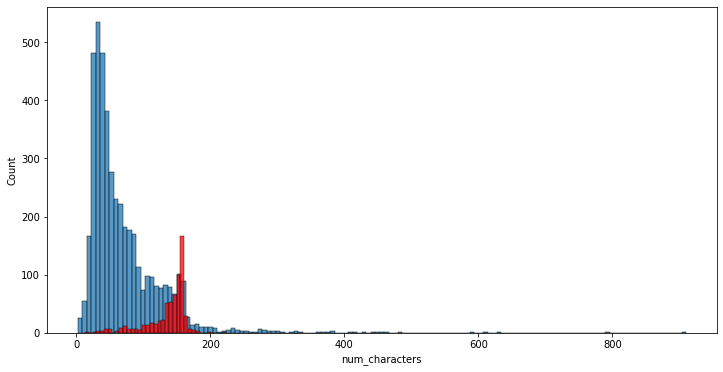

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

In [36]:
'''
From the above histogram, it is clear that for ham emails (['target'] == 0, in blue) the number of characters on average is much less
than that of spam emails (['target'] == 1 , in red)
'''

"\nFrom the above histogram, it is clear that for ham emails (['target'] == 0, in blue) the number of characters on average is much less\nthan that of spam emails (['target'] == 1 , in red)\n"

<AxesSubplot:xlabel='num_words', ylabel='Count'>

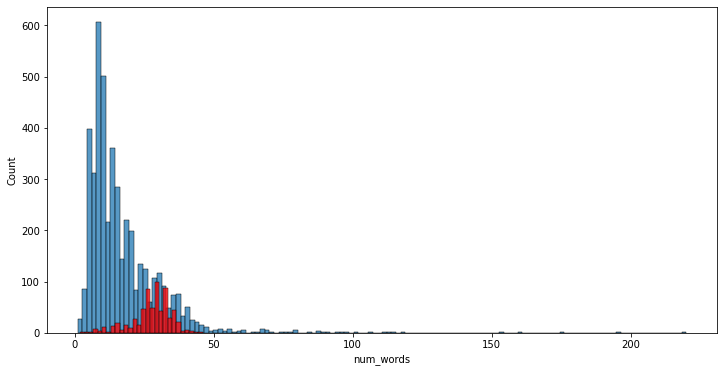

In [37]:
'''
Now lets apply the histogram to num_words columns as well
'''
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

In [38]:
'''
We can see a simillar pattern here as well
'''

'\nWe can see a simillar pattern here as well\n'

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

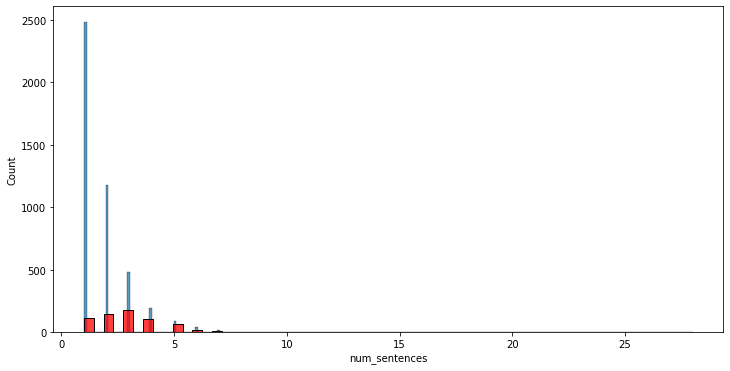

In [39]:
'''
Now lets apply the histogram to num_sentences columns as well
'''
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red')

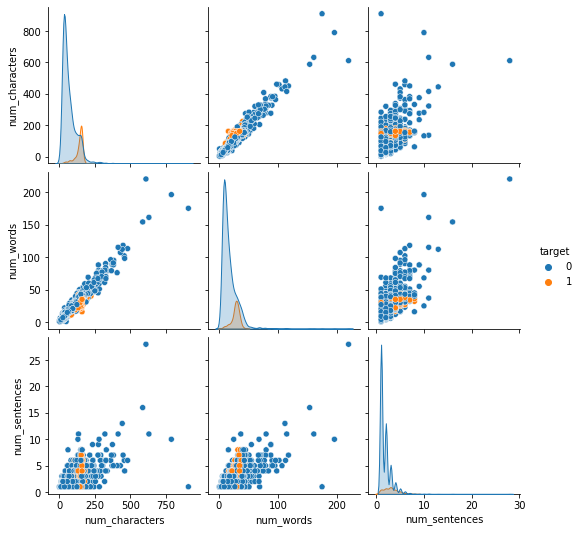

In [40]:
'''
Lets also look at the relationships between the columns in the dataset 
We can build a pairplot for this analysis
We can set the hue to target, so the plot shows the difference for ['target'] == 0 and ['target'] == 1 
'''

sns.pairplot(df,hue='target')

In [41]:
'''
We can also look at the correlation between columns
We can use corr()
And we can build a heatmap as well
'''

df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

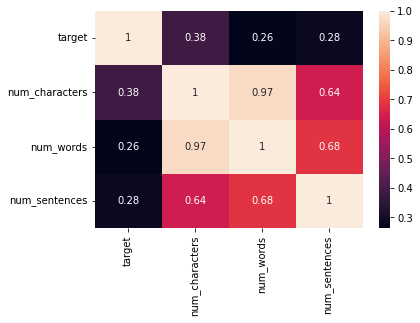

In [42]:
sns.heatmap(df.corr(), annot = True)

In [43]:
'''
From the above heatmap we can see that the target column has 0.38 correlation with num_characters. 
We would be inclined to choose the num_characters column during model building as it has the highest correlation with the 
taget column.
We wont be choosing all three columns for model building as there is high correlation between the columns num_characters,
num_words and num_sentences
'''

'\nFrom the above heatmap we can see that the target column has 0.38 correlation with num_characters. \nWe would be inclined to choose the num_characters column during model building as it has the highest correlation with the \ntaget column.\nWe wont be choosing all three columns for model building as there is high correlation between the columns num_characters,\nnum_words and num_sentences\n'

# 3. Data Preprocessing (In our case Text Preprocessing)
### Lower case
### Tokensization
### Removing special characters
### Removing stop words and punctuations
### Stemming

In [44]:
'''
Lets create a function that can perform all the 5 steps listed above
Lets first import necessary libraries
'''
from nltk.corpus import stopwords
# stopwords.words('english') is all the stopwords in english

import string
# string.punctuation is all the punctuation

from nltk.stem.porter import PorterStemmer

In [45]:
'''
Creating an abject for PorterStemmer
'''
ps = PorterStemmer()

In [46]:
def transform_text(text):
    # step 1
    text = text.lower()
    
    # step 2
    text = nltk.word_tokenize(text)
    
    #step 3
    y = []
    
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
                

    return " ".join(y)

In [47]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [48]:
# Now lets apply the transform_text function on the 'text' column of the dataframe

df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [49]:
df['transformed_text'] = df['text'].apply(transform_text)

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
'''
To view a graphical representation of words in the transformed_text either for ['target'] == 1 or for ['target'] == 0, 
we can build a word cloud
'''
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [52]:
'''
Lets generate a wordcloud for df['target'] == 1 which is spam and lets take the 'transformed_text' and we can take the string
from it and concatenate it on the space " " 
'''
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))



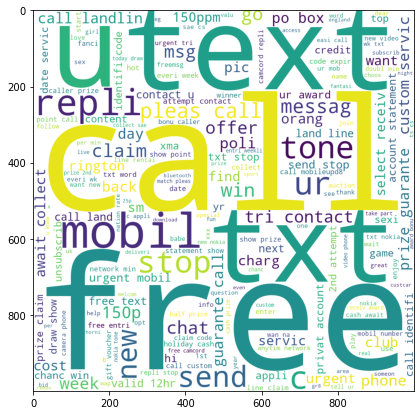

In [53]:
plt.figure(figsize= (15,7))
plt.imshow(spam_wc)

In [54]:
'''
As you can see the texts shows in large font size are the ones that appear at highest frequencies for spam emails
'''

'\nAs you can see the texts shows in large font size are the ones that appear at highest frequencies for spam emails\n'

In [55]:
'''
Now lets try to do the same thing for ham emails
'''
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

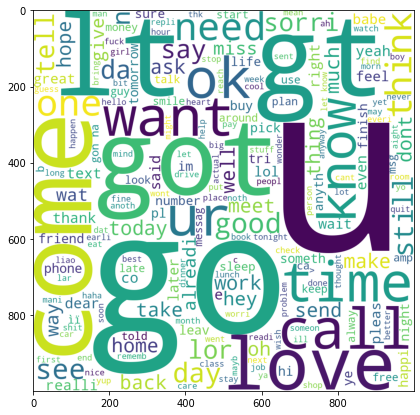

In [56]:
plt.figure(figsize= (15,7))
plt.imshow(ham_wc)

In [57]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [58]:
'''
Now lets find the top 30 words that are most frequently occuring in the spam emails
'''
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [59]:
'''
Here we are using inbuilt Counter function to count the freuency of each word
Then we are converting the frequency dictionary into a dataframe 
'''

from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\Vishnu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


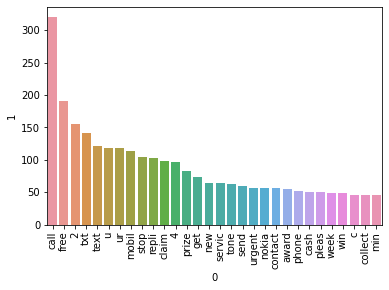

In [60]:
'''
Now we will use sns.barplot(x axis data, y axis data) to plot the graph of words vs frequency 
In our case x axis data will be "pd.DataFrame(Counter(spam_corpus).most_common(30))[0]" and y axis data will be 
"pd.DataFrame(Counter(spam_corpus).most_common(30))[1]"
'''

sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Vishnu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


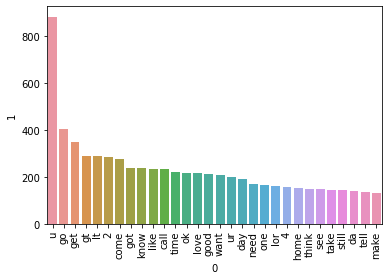

In [61]:
'''
Lets repeat the above steps for ham emails 
'''

ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))

sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building 

In [62]:
'''
Now we can start model building and for this project we will be using Naive Bayes since Naive bayes is appropriate when dealing
with textual data
We will also be using other algorithms, eg: Ensemble learning, and compare results to see  which algorithm would give 
us the best results
'''

'\nNow we can start model building and for this project we will be using Naive Bayes since Naive bayes is appropriate when dealing\nwith textual data\nWe will also be using other algorithms, eg: Ensemble learning, and compare results to see  which algorithm would give \nus the best results\n'

In [63]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [64]:
'''
As you can see the target is in numerical form, however the transformed_text, which is the input is not in numerical form
So we will have to convert this to numbers or vectorize it.

We can use bag or words to convert the transformed_text to vectors
'''

'\nAs you can see the target is in numerical form, however the transformed_text, which is the input is not in numerical form\nSo we will have to convert this to numbers or vectorize it.\n\nWe can use bag or words to convert the transformed_text to vectors\n'

In [65]:
'''
You can use the sklearn library to import CountVectorizer, which converts each word in each email into a matrix 
'''

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)


In [66]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [67]:
'''
The shape shows that there are 5169 emaila and 6708 words, emails on the vertical axis and words on the horizontal
'''
X.shape

(5169, 3000)

In [68]:
'''
We create the matrix for the target variable as well
'''
y = df['target'].values

In [69]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [70]:
'''
Now we can split the data into train and test sets 
'''
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=2)

In [72]:
'''
Lets import our ML algirithms and the accuracy metrics to see how well the model performs
'''
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [73]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [74]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [75]:
'''
The accuracy score is decent at 88% however the precision score is not very good 
'''

'\nThe accuracy score is decent at 88% however the precision score is not very good \n'

In [76]:
'''
Now lets run the mnb model with the same data
'''
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [77]:
'''
The accuracy score is better at 96% and the precision score is much much better than the gnb model, howerver we are looking
for an accuracy score that is much greater
'''

'\nThe accuracy score is better at 96% and the precision score is much much better than the gnb model, howerver we are looking\nfor an accuracy score that is much greater\n'

In [78]:
'''
Now lets run the bnb model with the same data
'''
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [79]:
'''
The accuracy score is better at 97% and the precision score is much much better than the mnb model at 97%
'''

'\nThe accuracy score is better at 97% and the precision score is much much better than the mnb model at 97%\n'

In [80]:
# tfidf --> MNB
'''
We have decided to go with Bernoulli Naive Bayes as it gives the highest accuracy score when we used tfidf

Further we will be looking at other machine learning algorithms to compare with Bernoulli Naive bayes
'''

'\nWe have decided to go with Bernoulli Naive Bayes as it gives the highest accuracy score when we used tfidf\n\nFurther we will be looking at other machine learning algorithms to compare with Bernoulli Naive bayes\n'

In [81]:
'''
Below are almost all the classification algorithms in Machine Learning 
'''

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [82]:
'''
We will create objects for each algorithm and keep the parameters standard 
'''

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
#mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [83]:
'''
We will create a disctionaries with keys being teh name of the algorithm and values being the object created in the 
previous cell
'''
clfs = {
    'SVC' :svc,
    'KN' : knc,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [84]:
'''
Here we are creating a function where it returns the accuracy and precision with input of the ML algorithm object and 
test_train_split data
'''

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [85]:
'''
Lets check if teh function is working 
'''
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [86]:
'''
Here we are creating two lists accuracy_scores and precision_scores and using a for loop and the function train_classifier, 
We will append the accuracy_score and precision_score calculated for each algorithm into the respective lists
'''

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For ",name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [90]:
'''
Now we will create a dataframe to see in a systematic way on what the accuracy_score and precision_score will be for each 
algorithm
'''

performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores }).sort_values('Precision', ascending=False)

In [91]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
4,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
7,ETC,0.974855,0.974576
3,LR,0.958414,0.970297
9,xgb,0.971954,0.943089
5,AdaBoost,0.960348,0.929204
8,GBDT,0.947776,0.920000
6,BgC,0.957447,0.867188
2,DT,0.929400,0.828283


In [92]:
'''
We can convert the dataframe into a more usable form in order to create a bar graph using pd.melt, we pass in the original 
dataframe and put id_vars='Algorithm'
'''
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

In [93]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,RF,Accuracy,0.974855
2,SVC,Accuracy,0.975822
3,ETC,Accuracy,0.974855
4,LR,Accuracy,0.958414
5,xgb,Accuracy,0.971954
6,AdaBoost,Accuracy,0.960348
7,GBDT,Accuracy,0.947776
8,BgC,Accuracy,0.957447
9,DT,Accuracy,0.929400


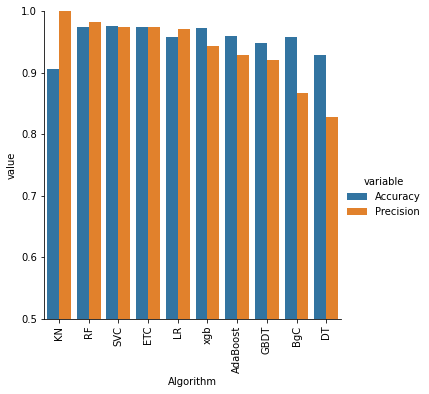

In [94]:
'''
Lets plot a bar graph to graphically show the accuracy and precision for each ML algorithm
'''
sns.catplot(x = 'Algorithm', y='value',
           hue = 'variable', data = performance_df1, kind = 'bar', height=5)

plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [95]:
'''
Lets now try to improve the model 

Few ways to imporove the model:

1. input max_features = 3000 for TfidfVectorizer, X = tfidf.fit_transform(df['transformed_text']).toarray()

2. We can scale the input X to have values between 0 and 1, we can use MinMaxScaler()

3. We can append the 'num_characters' into the X input 

X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

I have chosen to use 1. input max_features = 3000 for TfidfVectorizer
'''

"\nLets now try to improve the model \n\nFew ways to imporove the model:\n\n1. input max_features = 3000 for TfidfVectorizer, X = tfidf.fit_transform(df['transformed_text']).toarray()\n\n2. We can scale the input X to have values between 0 and 1, we can use MinMaxScaler()\n\n3. We can append the 'num_characters' into the X input \n\nX = np.hstack((X,df['num_characters'].values.reshape(-1,1)))\n\nI have chosen to use 1. input max_features = 3000 for TfidfVectorizer\n"

# Voting Classifier
'''
Now lets try to implement a voting classifier to combine couple of the ML algorithm to get a much more higher accuracy and 
precision score
'''
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('svm',svc), ('nb',mnb),('et',etc)], voting='soft')

voting.fit(X_train,y_train)

y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test, y_pred))
print('Precision',precision_score(y_test,y_pred))

'''
As you can see accurcay score is still high however, we still want a precision score that is higher than 0.99

Therefore i will also try an approach of using stacking method
'''

# Applying Stacking
estimators = [('svm', svc),('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [96]:
'''
From the analysis of trying to improve the model using multiple techniques/methods, we did not get any significant improvement
therefore, we will go ahead and use the Multinomial Naive Bayes that gave the highest accuracy and precision

Further, not that we know we will be going ahead with Multinomial Naive Bayes algorithm/model, we will build a pipeline which
will then be converted to a website
'''

'\nFrom the analysis of trying to improve the model using multiple techniques/methods, we did not get any significant improvement\ntherefore, we will go ahead and use the Multinomial Naive Bayes that gave the highest accuracy and precision\n\nFurther, not that we know we will be going ahead with Multinomial Naive Bayes algorithm/model, we will build a pipeline which\nwill then be converted to a website\n'

In [97]:
# A quick preview of steps for a pipeline

# step 1: Transform the text
# step 2: Vectorize the text 
# step 3: Apply the algorithm to create ML model

In [98]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))